# Здесь собрал понравившиеся мне фрагменты кода    

*Загрузка библиотек конечно же важно, поэтому с неё и начинают*

In [1]:
# загружаем инструменты
import pandas as pd  
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go

## Немного "голого" питона

**Задача с рекурсией**

Реализуйте программу, которая для заданных n и k вычисляет Число сочетаний из n по k  C(n, k).

Вашей программе на вход подается строка, содержащая два целых числа n и k (1 ≤ n ≤ 10, 0 ≤ k ≤ 10).
Ваша программа должна вывести единственное число: C(n, k).

In [2]:
# Рекурсия красивая очень
def sochet(a,b):
    if b==0:
        return 1
    elif b>a:
        return 0
 
    else:
        return sochet(a-1,b)+sochet(a-1,b-1)
        
n, k = map(int, input().split())
print(sochet(n,k))


8 3
56


*Правда, говорят интерпретатор Python рекурсию переводит в цикл ...*

**Задача показывает как удобно иметь разные типы данных.**

Реализуйте программу, которая будет вычислять количество различных объектов в списке.
Два объекта a и b считаются различными, если a is b равно False.

Вашей программе доступна переменная с названием objects, которая ссылается на список, содержащий не более 100 объектов. Выведите количество различных объектов в этом списке.

In [3]:
# Изящно (переменная типа set бывает незаменима)
objects = [1, 2, 1, 5, True, False, True, 'false', [], [1,2]]
l=[]
for el in objects:
    l.append(id(el))
print(len(set(l)))


8


**Задача показывает многообразие возможных решений.**

У Дори в глубинах океана есть кучка камней. Часть камней из этой кучки драгоценные. Недавно она пересчитала все драгоценные и забыла сколько их. Чтобы больше не забывать, Дори решила написать на питоне функцию, которая будет считать камни за неё.

Напишите на python функцию, которая принимает на вход список драгоценных камней $J$ и список камней, которые есть у Дори $S$. На выход функция возвращает число драгоценных камней в запасах Дори.

__Примеры:__ 

> Input: J = "aA", S = "aAAbbbb" <br />
Output: 3

Тут драгоценными считаются камни a и A. У Дори есть камни aAAbbbb. Среди них три драгоценных, aAA.

>Input: J = "z", S = "ZZ" <br />
Output: 0

Драгоценными мы считаем только камень z. У Дори два камня, оба обычные.

**Некоторые варианты:**

In [4]:
# то, что называют линейным программированием 
def numJewelsInStones(J, S):
    cn=0
    for i in S:
        for j in J:
            if j == i:
                cn+=1
    return cn
print(numJewelsInStones("aA", "aAAbbbb"))
print(numJewelsInStones("z", "ZZ"))


3
0


In [5]:
# близкое к "однострочнику"
J = "aA" 
S = "aAAbbbb"
print(len([x for x in list(S) if x in list(J)]))


3


In [6]:
# неправильное решение, не учитывается повторяемость символов
def numJewelsInStones(J, S):
    n=len(set(J))+len(set(S))
    c=set()
    for i in S:
        c.add(i)
    for j in J:
        c.add(j)
    cn=n-len(c)
    return cn 
print(numJewelsInStones("aA", "aAAbbbb"))
print(numJewelsInStones("z", "ZZ"))


2
0


In [7]:
# неправильное решение, тоже не учитывается повторяемость символов
J = "aA" 
S = "aAAbbbb"
a = list(map(lambda x,y: x==y,list(S),list(J)))
print (len(a))


2


In [8]:
# решение с помощью методов pandas
J = "aA" 
S = "aAAbbbb"
lj = pd.DataFrame(list(J))
ls = pd.DataFrame(list(S))
print(len(lj.merge(ls,indicator = True, how='left').loc[lambda x : x['_merge']=='both']))


3


**Задача на работу с данными типа str.**

Напишите программу, которая определяет, является ли введённое слово (без пробелов) палиндромом, то есть верно ли, что оно читается одинаково слева направо и справа налево. 

In [9]:
# Проверка палиндрома
s=input()
s1=s[::-1]
if s==s1:
    print('Палиндром')
else:
    print('Нет') 

авва
Палиндром


## Библиотека Pandas

*Чаще всего данные грузятся из файла .csv или из SQL запроса. Для наших целей соберём данные вручную.*

In [10]:
# Пустой датафрейм
df = pd.DataFrame()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

In [11]:
# Создадим данные для примеров. Строки создаются из словаря
d = {'num_legs': [4, 4, 2, 2],
     'num_wings': [0, 0, 2, 2],
     'class': ['mammal', 'mammal', 'mammal', 'bird'],
     'animal': ['cat', 'dog', 'bat', 'penguin'],
     'locomotion': ['walks','walks','flies','walks']}
df = pd.DataFrame(data=d)
df

num_legs  num_wings   class   animal locomotion
0         4          0  mammal      cat      walks
1         4          0  mammal      dog      walks
2         2          2  mammal      bat      flies
3         2          2    bird  penguin      walks

**Добавим данные разными способами**

In [12]:
# Добавление строки из списка
l=[8,0,'arthropods','spider','walks']
s2 = pd.Series(l, index=['num_legs','num_wings','class','animal','locomotion'])
df = df.append(s2, ignore_index=True)
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_15288\1356783475.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(s2, ignore_index=True)


num_legs  num_wings       class   animal locomotion
0         4          0      mammal      cat      walks
1         4          0      mammal      dog      walks
2         2          2      mammal      bat      flies
3         2          2        bird  penguin      walks
4         8          0  arthropods   spider      walks

In [13]:
# создание датафрейма из списка
l1=[[2,4,6],[2,0,4],['bird','mammal','insect'],['ostrich','mammoth','dragonfly'],['walks','walks','flies']]
df2 = pd.DataFrame(l1).T
df2

0  1       2          3      4
0  2  2    bird    ostrich  walks
1  4  0  mammal    mammoth  walks
2  6  4  insect  dragonfly  flies

In [14]:
# переименуем столбцы  в df2
df2.columns = ['num_legs', 'num_wings', 'class', 'animal', 'locomotion']
df2

num_legs num_wings   class     animal locomotion
0        2         2    bird    ostrich      walks
1        4         0  mammal    mammoth      walks
2        6         4  insect  dragonfly      flies

In [15]:
# Обьединим датафреймы с одинаковыми столбцами (с разными столбцами лучше merge)
df=pd.concat([df, df2], ignore_index=True)
df

num_legs num_wings       class     animal locomotion
0        4         0      mammal        cat      walks
1        4         0      mammal        dog      walks
2        2         2      mammal        bat      flies
3        2         2        bird    penguin      walks
4        8         0  arthropods     spider      walks
5        2         2        bird    ostrich      walks
6        4         0      mammal    mammoth      walks
7        6         4      insect  dragonfly      flies

In [16]:
# добавим столбец из списка 
l3=[7,5,2,6,np.NaN,4,5,7]
s1 = pd.Series(l3, name="rating")
df = pd.concat([df, s1], axis=1)
df

num_legs num_wings       class     animal locomotion  rating
0        4         0      mammal        cat      walks     7.0
1        4         0      mammal        dog      walks     5.0
2        2         2      mammal        bat      flies     2.0
3        2         2        bird    penguin      walks     6.0
4        8         0  arthropods     spider      walks     NaN
5        2         2        bird    ostrich      walks     4.0
6        4         0      mammal    mammoth      walks     5.0
7        6         4      insect  dragonfly      flies     7.0

In [17]:
# добавим столбец из списка еще проще
df["alive"] = [1,1,1,1,1,1,0,1]
df

num_legs num_wings       class     animal locomotion  rating  alive
0        4         0      mammal        cat      walks     7.0      1
1        4         0      mammal        dog      walks     5.0      1
2        2         2      mammal        bat      flies     2.0      1
3        2         2        bird    penguin      walks     6.0      1
4        8         0  arthropods     spider      walks     NaN      1
5        2         2        bird    ostrich      walks     4.0      1
6        4         0      mammal    mammoth      walks     5.0      0
7        6         4      insect  dragonfly      flies     7.0      1

In [18]:
# добавим столбец из словаря
df4 = pd.DataFrame({'head_in_sand':[0,0,0,0,np.NaN,1,0,0]})
df=pd.concat([df, df4],  axis=1)
df

num_legs num_wings       class     animal locomotion  rating  alive  \
0        4         0      mammal        cat      walks     7.0      1   
1        4         0      mammal        dog      walks     5.0      1   
2        2         2      mammal        bat      flies     2.0      1   
3        2         2        bird    penguin      walks     6.0      1   
4        8         0  arthropods     spider      walks     NaN      1   
5        2         2        bird    ostrich      walks     4.0      1   
6        4         0      mammal    mammoth      walks     5.0      0   
7        6         4      insect  dragonfly      flies     7.0      1   

   head_in_sand  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           NaN  
5           1.0  
6           0.0  
7           0.0

In [19]:
# добавим столбец из случайных значений для красивого графика 
df['violin'] = np.random.randint(1, 33, 8)
df['violin']

0    22
1     4
2    20
3    20
4    22
5    31
6    10
7    27
Name: violin, dtype: int32

In [20]:
# Посмотрим, что собрали
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_legs      8 non-null      object 
 1   num_wings     8 non-null      object 
 2   class         8 non-null      object 
 3   animal        8 non-null      object 
 4   locomotion    8 non-null      object 
 5   rating        7 non-null      float64
 6   alive         8 non-null      int64  
 7   head_in_sand  7 non-null      float64
 8   violin        8 non-null      int32  
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 672.0+ bytes


In [21]:
# Попробуем перевести столбец 'animal' типа object  в цифровой вид. Получаются NaN-ы. Сам df не меняем.
print(pd.to_numeric(df['animal'], errors='coerce'))


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
Name: animal, dtype: float64


*Не любой тип в любой переводится.*

In [22]:
# Попробуем перевести столбцы в цифровой тип:
df['num_legs'] = pd.to_numeric(df['num_legs'], errors='coerce')
df['num_wings'] = pd.to_numeric(df['num_wings'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_legs      8 non-null      int64  
 1   num_wings     8 non-null      int64  
 2   class         8 non-null      object 
 3   animal        8 non-null      object 
 4   locomotion    8 non-null      object 
 5   rating        7 non-null      float64
 6   alive         8 non-null      int64  
 7   head_in_sand  7 non-null      float64
 8   violin        8 non-null      int32  
dtypes: float64(2), int32(1), int64(3), object(3)
memory usage: 672.0+ bytes


*Здесь уже работает.*

In [23]:
# Переведем из цифрового в тип str:
df['alive'] = df['alive'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_legs      8 non-null      int64  
 1   num_wings     8 non-null      int64  
 2   class         8 non-null      object 
 3   animal        8 non-null      object 
 4   locomotion    8 non-null      object 
 5   rating        7 non-null      float64
 6   alive         8 non-null      object 
 7   head_in_sand  7 non-null      float64
 8   violin        8 non-null      int32  
dtypes: float64(2), int32(1), int64(2), object(4)
memory usage: 672.0+ bytes


*Здесь тоже работает.*

In [24]:
# Категоризация данных столбца встроенной функцией.
df['legs_category'] = pd.cut(df['num_legs'],
                       bins = [0,2,4,8],
                    labels = ['A','B','C']) 
df

num_legs  num_wings       class     animal locomotion  rating alive  \
0         4          0      mammal        cat      walks     7.0     1   
1         4          0      mammal        dog      walks     5.0     1   
2         2          2      mammal        bat      flies     2.0     1   
3         2          2        bird    penguin      walks     6.0     1   
4         8          0  arthropods     spider      walks     NaN     1   
5         2          2        bird    ostrich      walks     4.0     1   
6         4          0      mammal    mammoth      walks     5.0     0   
7         6          4      insect  dragonfly      flies     7.0     1   

   head_in_sand  violin legs_category  
0           0.0      22             B  
1           0.0       4             B  
2           0.0      20             A  
3           0.0      20             A  
4           NaN      22             C  
5           1.0      31             A  
6           0.0      10             B  
7           0.0      27             C

*Условия категоризации несколько "хардкорные".*

**Возможные вариант работы с данными типа "str"**

In [25]:
# Создадим столбец str 
df['str'] = df['class'].str.split(' ').str[0]
df['str']

0        mammal
1        mammal
2        mammal
3          bird
4    arthropods
5          bird
6        mammal
7        insect
Name: str, dtype: object

*Этот код отделяет первое слово в фразе столбца. В нашем случае слово одно - поэтому дублирует.*

In [26]:
#логическое значение False — в противоположном случае.
df['is'] = df['locomotion'].str.contains('flies')
df['is']

0    False
1    False
2     True
3    False
4    False
5    False
6    False
7     True
Name: is, dtype: bool

*Столбец логических значений.*

**При необходимости можем сделать копию данных, хоть это и увеличивает обьем памяти**

In [27]:
# сохраняем данные в копии
dfres = df.copy(deep=True)
dfres.head(3)

num_legs  num_wings   class animal locomotion  rating alive  head_in_sand  \
0         4          0  mammal    cat      walks     7.0     1           0.0   
1         4          0  mammal    dog      walks     5.0     1           0.0   
2         2          2  mammal    bat      flies     2.0     1           0.0   

   violin legs_category     str     is  
0      22             B  mammal  False  
1       4             B  mammal  False  
2      20             A  mammal   True

**Не забываем, что можем сохранить данные в формате всеми любимого EXEL.**

In [28]:
# Сохраним данные в формате exel
df.to_excel('./data1.xlsx')

## Следующий блок минимальной проверки "сырых" данных.

In [29]:
# Общая, но ценная информация. Видно в том числе количество пропусков и тип данных.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   num_legs       8 non-null      int64   
 1   num_wings      8 non-null      int64   
 2   class          8 non-null      object  
 3   animal         8 non-null      object  
 4   locomotion     8 non-null      object  
 5   rating         7 non-null      float64 
 6   alive          8 non-null      object  
 7   head_in_sand   7 non-null      float64 
 8   violin         8 non-null      int32   
 9   legs_category  8 non-null      category
 10  str            8 non-null      object  
 11  is             8 non-null      bool    
dtypes: bool(1), category(1), float64(2), int32(1), int64(2), object(5)
memory usage: 884.0+ bytes


In [30]:
# Более детальная информация по цифровым столбцам.
df.describe()

num_legs  num_wings    rating  head_in_sand     violin
count   8.00000   8.000000  7.000000      7.000000   8.000000
mean    4.00000   1.250000  5.142857      0.142857  19.500000
std     2.13809   1.488048  1.772811      0.377964   8.717798
min     2.00000   0.000000  2.000000      0.000000   4.000000
25%     2.00000   0.000000  4.500000      0.000000  17.500000
50%     4.00000   1.000000  5.000000      0.000000  21.000000
75%     4.50000   2.000000  6.500000      0.000000  23.250000
max     8.00000   4.000000  7.000000      1.000000  31.000000

In [31]:
# явные дубликаты
df.duplicated().sum()

0

*Работа с неявными дубликатами всегда творческая.*

<AxesSubplot:>

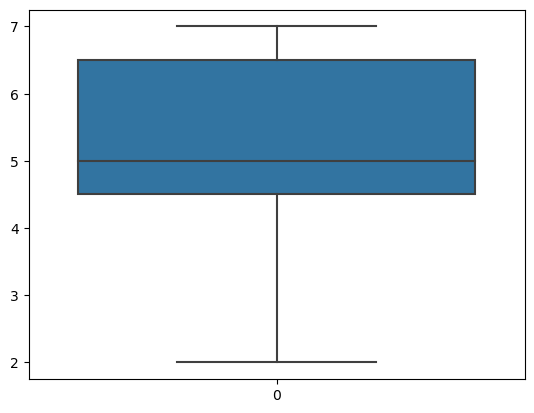

In [32]:
# Посмотреть на выбросы в столбце
sns.boxplot(data=df['rating'])

*Не просто видно, а и можно сразу определить границу среза.*

In [33]:
# процент пропущенных значений
df.isna().mean()  

num_legs         0.000
num_wings        0.000
class            0.000
animal           0.000
locomotion       0.000
rating           0.125
alive            0.000
head_in_sand     0.125
violin           0.000
legs_category    0.000
str              0.000
is               0.000
dtype: float64

**Далее варианты работы с пропусками.**

In [34]:
# Отсортируем число пропусков по убыванию
df.isnull().sum().sort_values(ascending=False)

rating           1
head_in_sand     1
num_legs         0
num_wings        0
class            0
animal           0
locomotion       0
alive            0
violin           0
legs_category    0
str              0
is               0
dtype: int64

In [35]:
# Заполним пропуски значением медианы по столбцу.
df['rating']=df['rating'].fillna(df['rating'].median())
df['rating']

0    7.0
1    5.0
2    2.0
3    6.0
4    5.0
5    4.0
6    5.0
7    7.0
Name: rating, dtype: float64

In [36]:
# Заполним пропуски значением "не указано".
df['head_in_sand'] = df['head_in_sand'].fillna('Не указано')
df['head_in_sand'].head(10)

0           0.0
1           0.0
2           0.0
3           0.0
4    Не указано
5           1.0
6           0.0
7           0.0
Name: head_in_sand, dtype: object

*Да, можно удалить строки с пропусками. Но помним, что принято удалять не больше 5-7% датафрейма!**

## Немного графиков

array([[<AxesSubplot:title={'center':'num_legs'}>,
        <AxesSubplot:title={'center':'num_wings'}>],
       [<AxesSubplot:title={'center':'rating'}>,
        <AxesSubplot:title={'center':'violin'}>]], dtype=object)

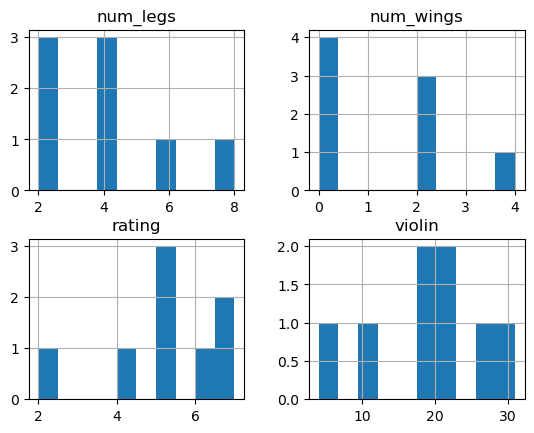

In [37]:
# Взглянуть на все цифровые данные "графически"
df.hist()

Text(0.5, 1.0, 'Распределение животных по рейтингу с учетом их способа передвижения\n')

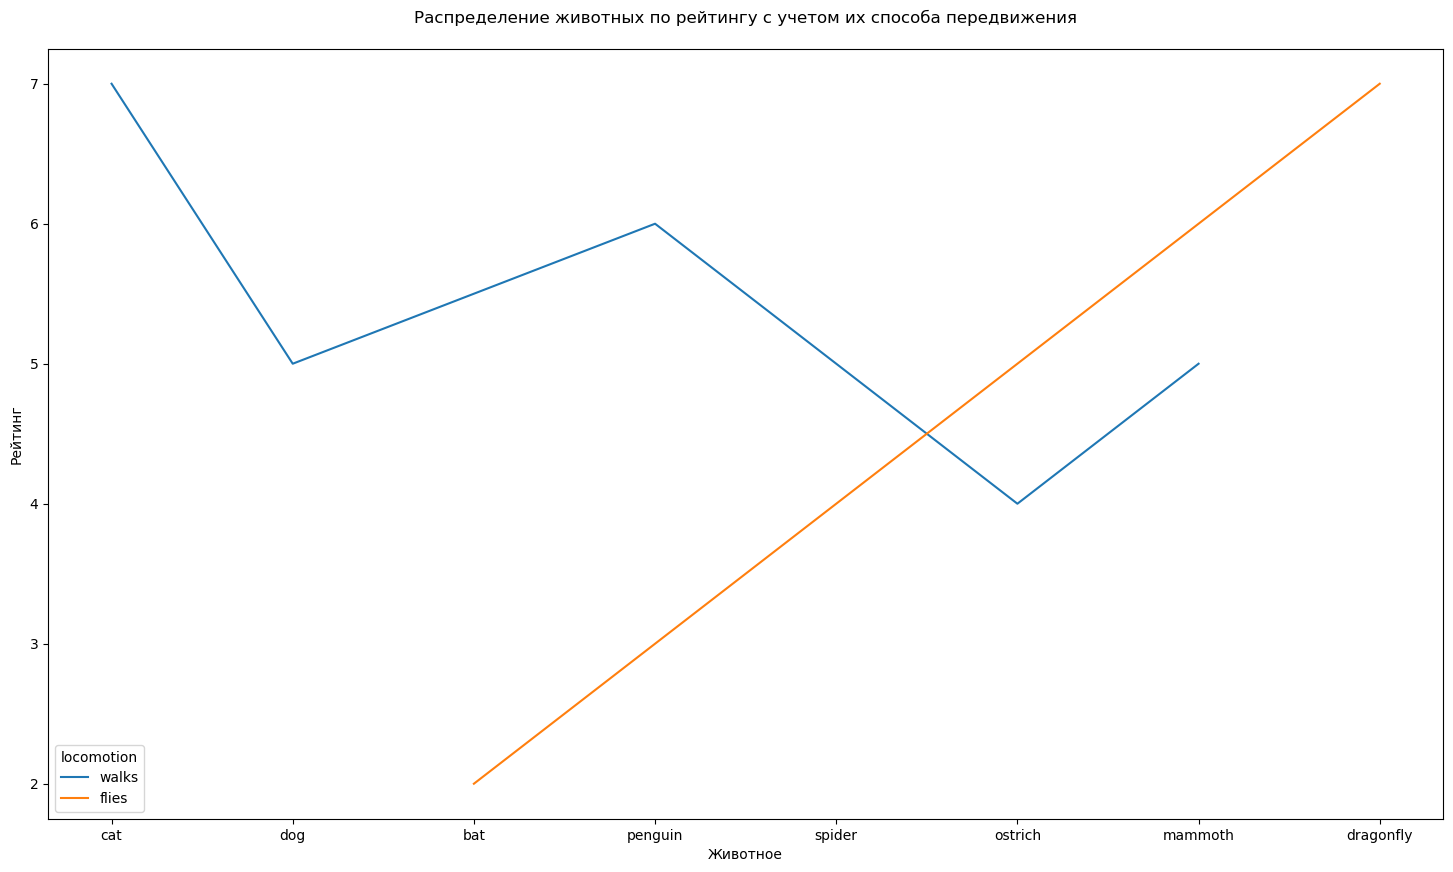

In [38]:
# линейный график
plt.figure(figsize=(18, 10)) 
sns.lineplot(x='animal', y='rating', hue='locomotion', data=df) 
plt.xlabel('Животное')
plt.ylabel('Рейтинг')
plt.title('Распределение животных по рейтингу с учетом их способа передвижения\n')

*Указав в графике "hue" добавляем как бы третью меру в изображение*

Text(0.5, 1.0, 'Распределение ног у животных в зависимости от способа передвижения\n')

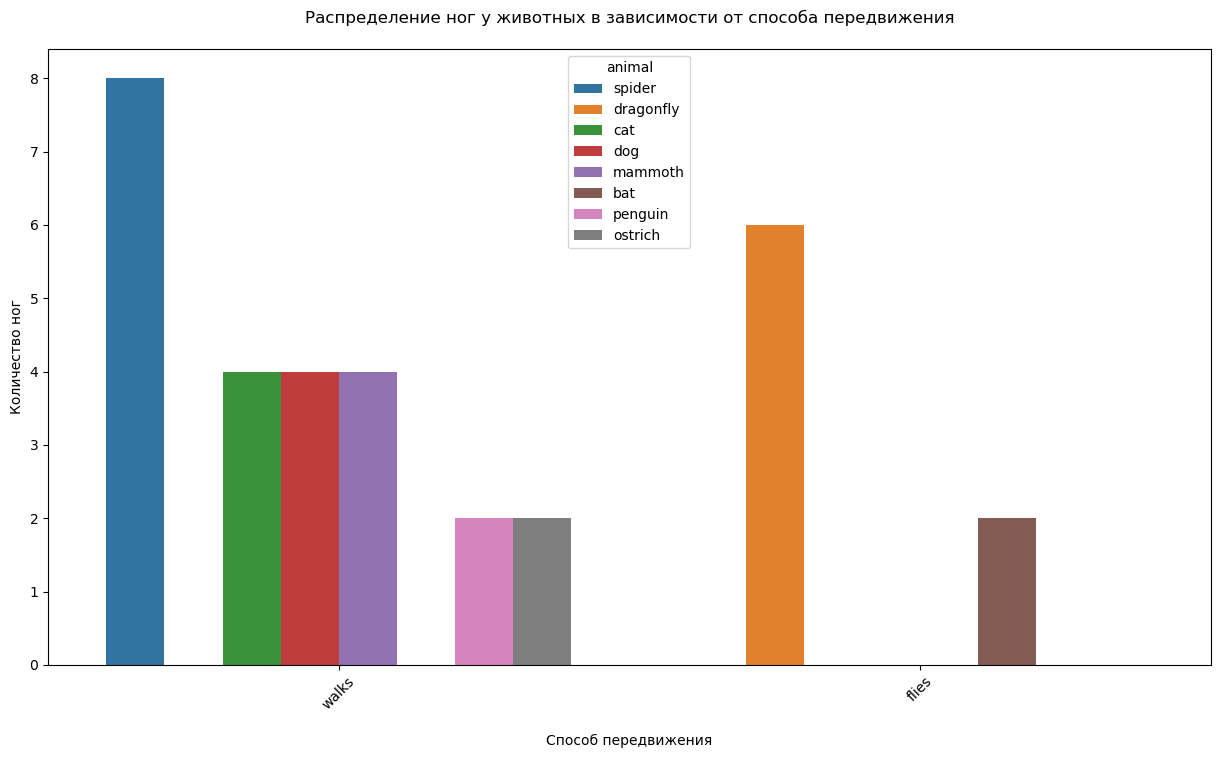

In [39]:
# данные для графика
a = df.sort_values(['num_legs'], ascending=False)
# сам график
plt.figure(figsize=(15, 8))
sns.barplot(x='locomotion', y='num_legs', hue='animal', data=a)
plt.xlabel('\nСпособ передвижения')
# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)
plt.ylabel('Количество ног')
plt.title('Распределение ног у животных в зависимости от способа передвижения\n')

Text(0.5, 1.0, 'Распределение ног у животных по их классу\n')

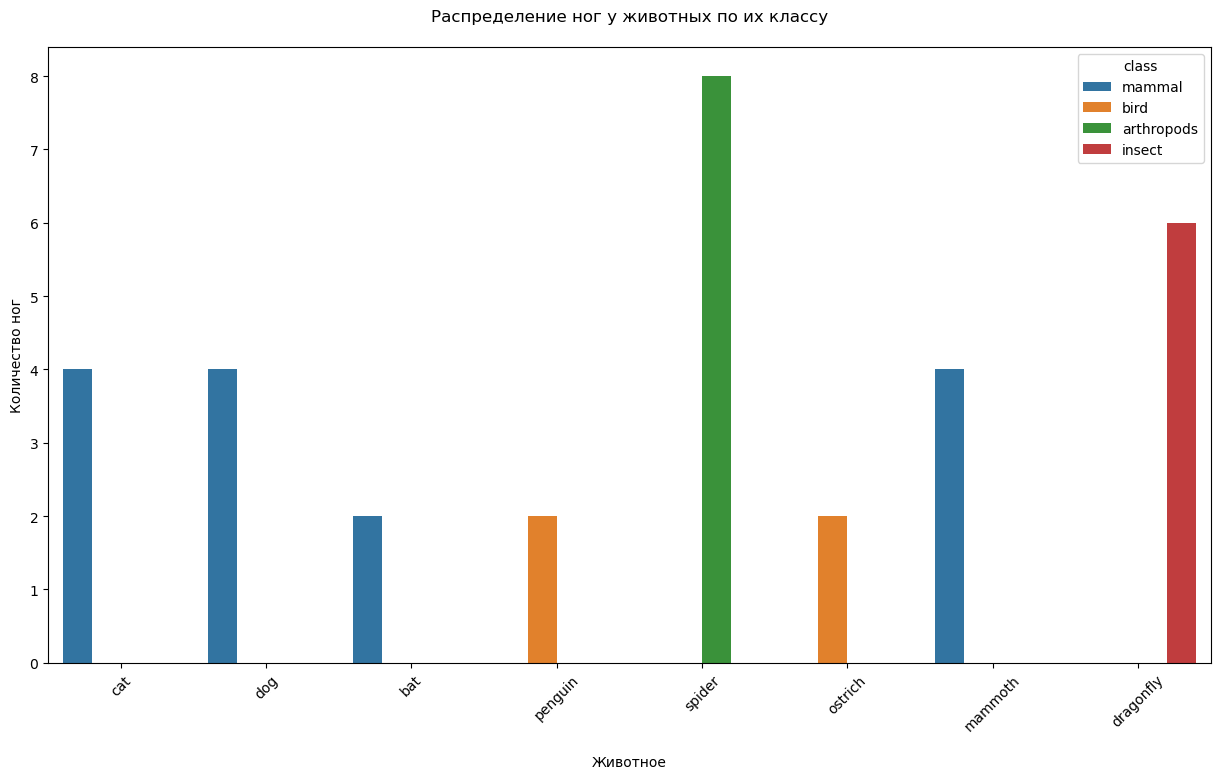

In [40]:
# столбчатая диаграмма
plt.figure(figsize=(15, 8))
sns.barplot(x='animal', y='num_legs', hue='class', data=df) #, estimator=median)
plt.xlabel('\nЖивотное')
# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)
plt.ylabel('Количество ног')
plt.title('Распределение ног у животных по их классу\n')

*Почему-то раньше считал круговую диаграмму неинформативной. Передумал.*    


In [41]:
# интерактивная круговая диаграмма
fig = go.Figure(data=[go.Pie(labels=df['class'], values=df['num_legs'])])
fig.update_layout(title='Распределение ног по видам животных', 
                  width=800, 
                  height=600)
fig.show() 

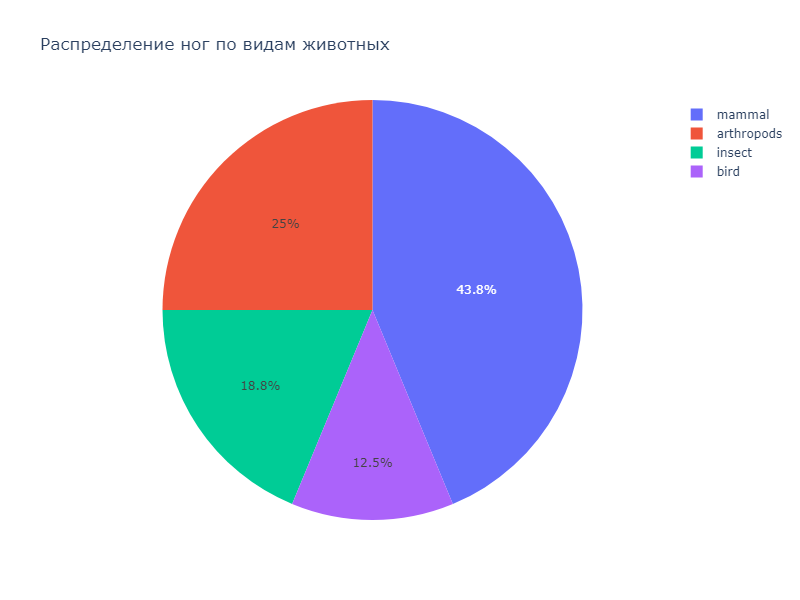

In [42]:
# интерактивная круговая диаграмма
fig = go.Figure(data=[go.Pie(labels=df['class'], values=df['violin'])])
fig.update_layout(title='Случайные значения по видам животных', # указываем заголовок графика
                  width=800, # указываем размеры графика
                  height=600)
fig.show() 

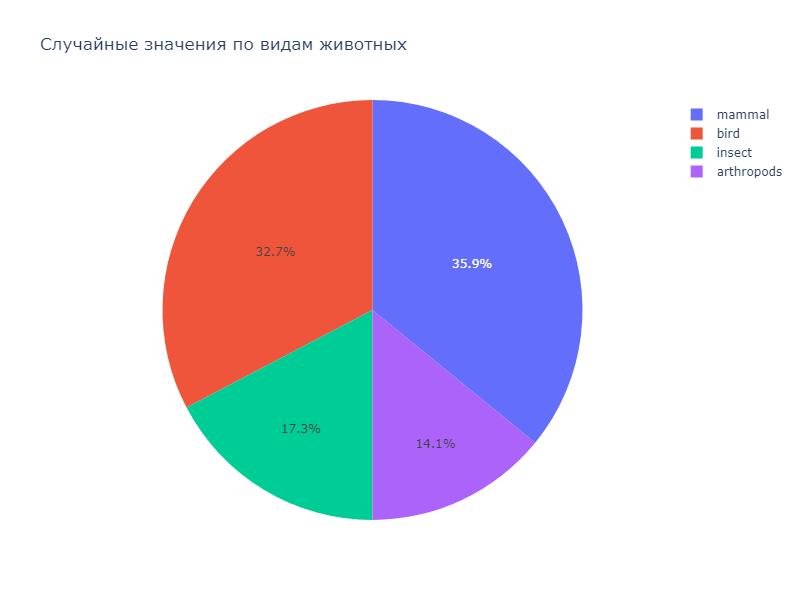

*Cущественное добавление к графику box-plot - форма распределения*

Text(0.5, 1.0, 'Распределение классов животных по случайным числам\n')

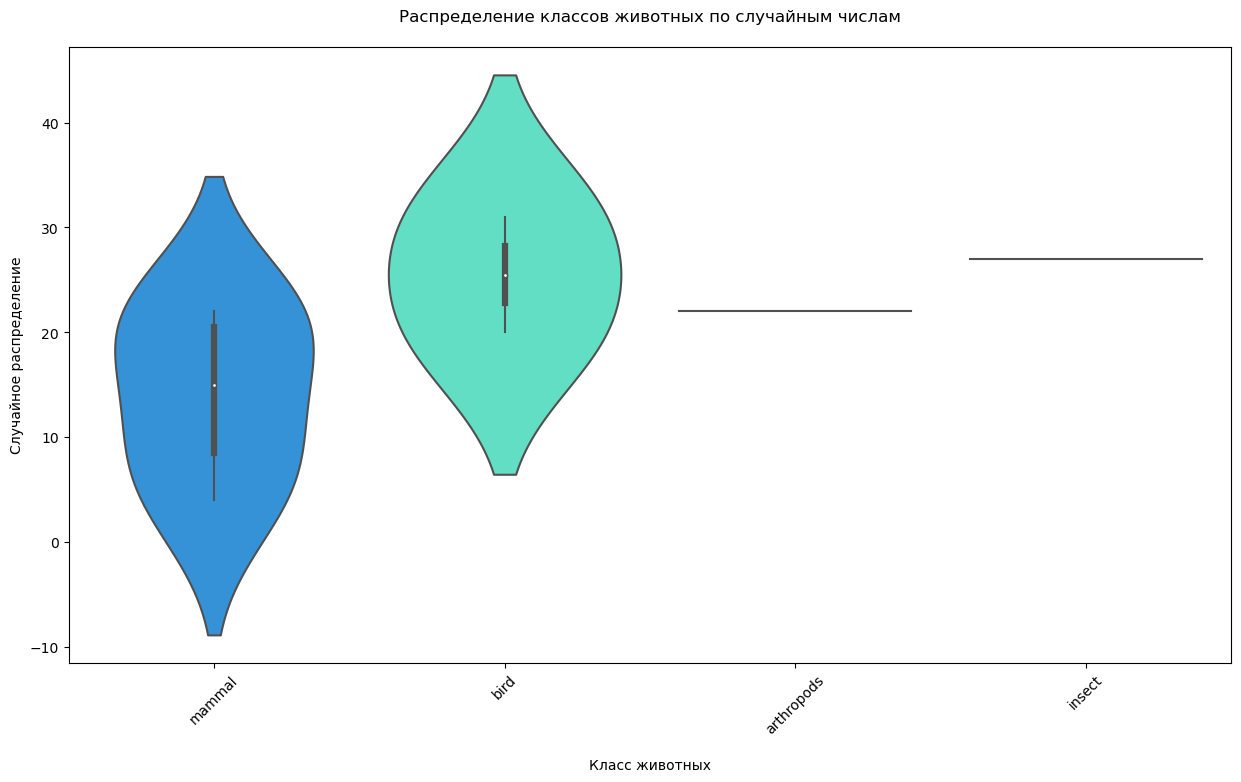

In [43]:
# скрипка
plt.figure(figsize=(15, 8))
sns.violinplot(x='class', y='violin', data=df, palette='rainbow')
plt.xlabel('\nКласс животных')
# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)
plt.ylabel('Случайное распределение')
plt.title('Распределение классов животных по случайным числам\n')


**Очень информативен график воронки.**   
**На наших данных его красиво не построить, поэтому выкладываю картинкой.**

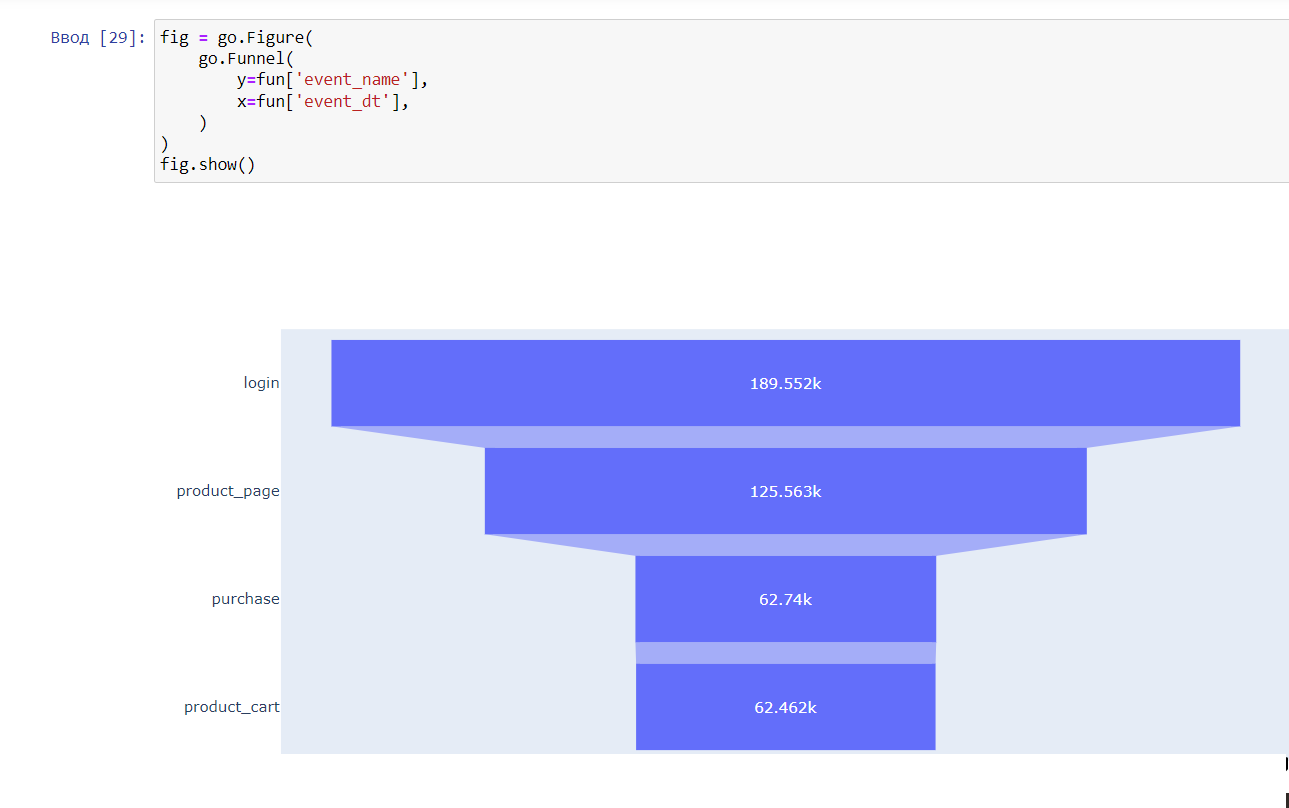

**Не могу не упомянуть библиотеку folium и её хороплет.**   
**Сомневаюсь, что здесь её можно запустить, поэтому тоже выкладываю картинками.**

 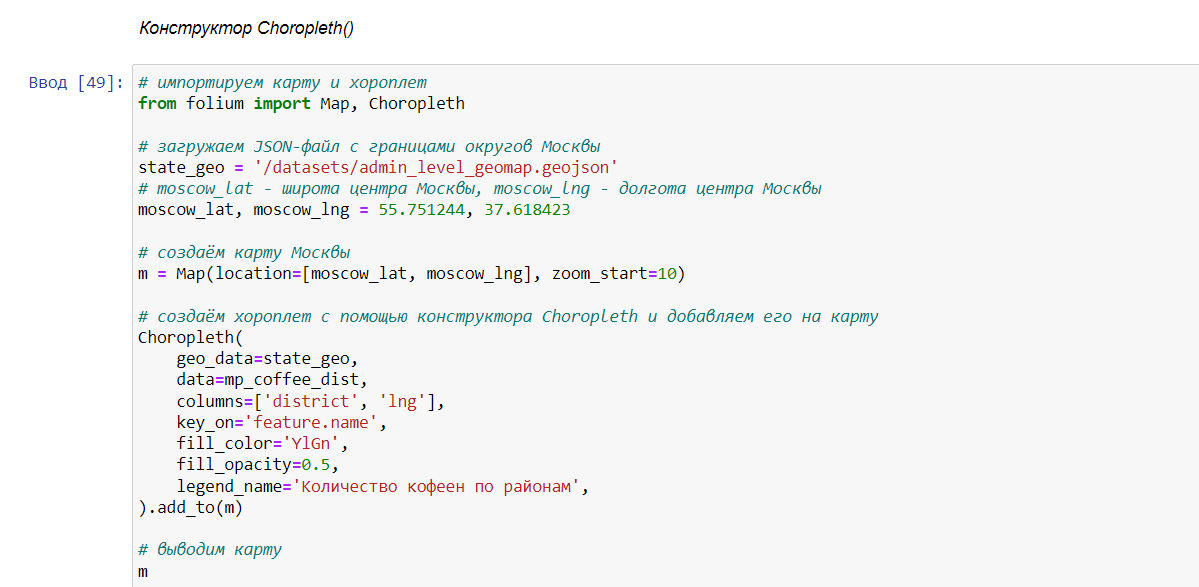

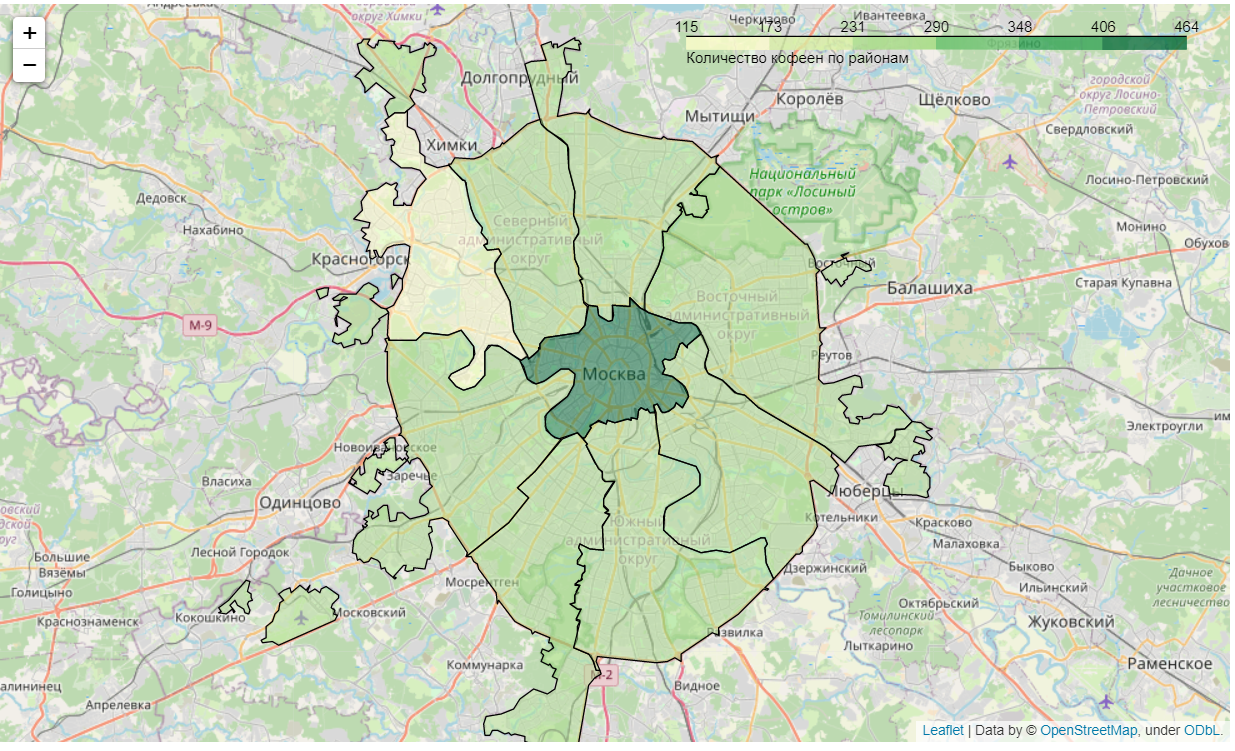